Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

## Contributors:
### Lukas Andersson - 17 Hours
### Ramapriya Navalpakkam - XX Hours

In [9]:
# imports
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from tensorflow.keras import regularizers
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.to_categorical(lbl_test, num_classes)


In [12]:

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.7607 - accuracy: 0.7839 - val_loss: 0.2436 - val_accuracy: 0.9273
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2421 - accuracy: 0.9270 - val_loss: 0.1893 - val_accuracy: 0.9404
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1833 - accuracy: 0.9448 - val_loss: 0.1577 - val_accuracy: 0.9520
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1435 - accuracy: 0.9567 - val_loss: 0.1309 - val_accuracy: 0.9607
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1248 - accuracy: 0.9639 - val_loss: 0.1150 - val_accuracy: 0.9634
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1053 - accuracy: 0.9687 - val_loss: 0.1113 - val_accuracy: 0.9664
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0933 - accuracy: 0.9724 - val_loss: 0.1027 - val_accuracy: 0.9679
Epoch 

### Question 1) 

The input data is first converted to float values and then divided by the maximum value. The maximum value that an image can have is 255 as any color in the RGB spectrum is of 8 bits. Hence we divide the values by 255 to normalise the values to range between 0.0 and 1.0 where 0.0 means 0 and 1.0 means 255.
The class label data is a 1D array of class labels but instead needs to be a matrix with 10 distinct class labels. This is done on the training and test set using ```keras.utils.to_categorical```.

### Question 2 
#### 2a ) 
The neural network has 4 layers excluding the input layer. The first layer  comprises of 28*28*1 neurons (columns or number of feautures). As the first layer flattens the matrix to a 1d array, its output is the neurons for the next layer (layer2) which is 784. The Dense function in both layer2 and layer3 defines the units as 64 hence, the neurons for layers 3 and 4 are 64.

The activation function used in this model is Rectified Linear Unit (relU) and a Softmax. These two activation functions are used in combination to train the model faster. The Relu function works to improve the non-linearity of data such as images reducing back propagation error. The softmax is a function applied to the output layer when the input layer consists of multiple classes to produce an output as a probability distribution. 

The total number of parameters for the neural network is 55050. In the input layer, all the data in the training set are fed to the neural network. The output must contain 10 outputs, each representing a class. So the data in fed as input is classified into the number of classes we have defined.




In [13]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None


#### 2b) 

The loss function used to train this set is a categorical cross entropy function. 

Cross Entropy = -$\sum_{i}^{N} y_ilog(\hat{y_i})$


where $\hat{y}$ is the probability of a predicted value belonging to a class i, y is the probability of the true value belonging to a class i and N is the number of classes. The sum of probability of the predicted value coinciding with the actual value for every class is given by the cross entropy function. The entropy will be a poisitve value if the predicted and actual probability distributions are equal.

This is appropriate for the MINST data as have multiple classes. Each image is made up of values that are made up of numbers ranging from 0-9. Hence when we create 10 different categories/classes that a bit of an image can belong to. The probablility of a bit belonging to one of these classes is predicted by the cross entropy function.




#### 2c)

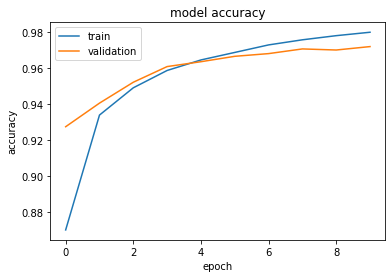

In [14]:
plt.plot(fit_info.history['accuracy'])
plt.plot(fit_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### 2d)

In [15]:
## Define model ##



regularizationVector = [0.000001, 0.00001, 0.0001, 0.00015, 0.001]
result =  pd.DataFrame({
    'reg_factor':[],
    'val_acc':[]
})
for r in regularizationVector:
  for i in range (0,3):
    model_reg = Sequential()
    model_reg.add(Flatten())
    model_reg.add(Dense(500, activation = 'relu', kernel_regularizer=regularizers.l2(l2=r)))
    model_reg.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.l2(l2=r)))
    model_reg.add(Dense(10, activation='softmax'))

    model_reg.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = r  ),
        metrics=['accuracy'],)

    fit_info = model_reg.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=40,
           verbose=1,
           validation_data=(x_test, y_test))
    score = model_reg.evaluate(x_test, y_test, verbose=0)
    result = result.append(pd.DataFrame(
        {
             'reg_factor':[r],
             'val_acc':[score[1]],
        }
    ),ignore_index = True)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

print(result)

Epoch 1/40
469/469 [==============================] - 2s 4ms/step - loss: 2.3281 - accuracy: 0.1109 - val_loss: 2.3327 - val_accuracy: 0.1013
Epoch 2/40
469/469 [==============================] - 2s 3ms/step - loss: 2.3250 - accuracy: 0.1111 - val_loss: 2.3322 - val_accuracy: 0.1016
Epoch 3/40
469/469 [==============================] - 2s 3ms/step - loss: 2.3224 - accuracy: 0.1131 - val_loss: 2.3317 - val_accuracy: 0.1018
Epoch 4/40
469/469 [==============================] - 2s 3ms/step - loss: 2.3240 - accuracy: 0.1101 - val_loss: 2.3311 - val_accuracy: 0.1020
Epoch 5/40
469/469 [==============================] - 2s 3ms/step - loss: 2.3212 - accuracy: 0.1133 - val_loss: 2.3306 - val_accuracy: 0.1022
Epoch 6/40
469/469 [==============================] - 2s 3ms/step - loss: 2.3246 - accuracy: 0.1122 - val_loss: 2.3301 - val_accuracy: 0.1028
Epoch 7/40
469/469 [==============================] - 2s 3ms/step - loss: 2.3229 - accuracy: 0.1104 - val_loss: 2.3296 - val_accuracy: 0.1036
Epoch 

Text(0.5, 0, 'reg_factor')

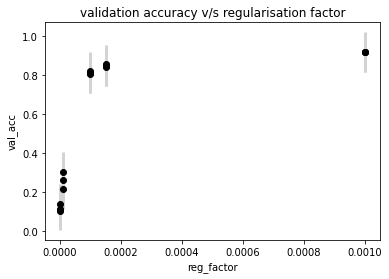

In [24]:
plt.figure()
plt.errorbar(result.reg_factor, result.val_acc,yerr=0.1,fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)
plt.title('validation accuracy v/s regularisation factor')
plt.ylabel('val_acc')
plt.xlabel('reg_factor')

We see that the validation accuracy as reported by hilton is not achieved. 

## 3
### a

In [25]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9), metrics=['accuracy'])

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 30s 5ms/step - loss: 0.4591 - accuracy: 0.8602 - val_loss: 0.1310 - val_accuracy: 0.9623
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1210 - accuracy: 0.9644 - val_loss: 0.0837 - val_accuracy: 0.9744
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0754 - accuracy: 0.9787 - val_loss: 0.0751 - val_accuracy: 0.9763
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0532 - accuracy: 0.9851 - val_loss: 0.0581 - val_accuracy: 0.9818
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0482 - accuracy: 0.9865 - val_loss: 0.0529 - val_accuracy: 0.9841
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0368 - accuracy: 0.9900 - val_loss: 0.0491 - val_accuracy: 0.9846
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0304 - accuracy: 0.9914 - val_loss: 0.0522 - val_accuracy: 0.9828
Epoch

### Layers
First we have a convolutional layer, a max pooling layer and flatten it out to find and provide features that we then can examine to get a result. We then have a dense layer and one output layer with 10 nodes that uses the softmax activation function that decides between the 10 nodes. Did not quite reach 99% accuracy, 98.6 is the best run so far.

### b
Convolutional layers outperform fully connected layers in this case, image classification. When working with images convolutional layers are really good since what they do is detecting features on a low level and then base classifications on those found features. It is very good at finding similiar patterns or features in new pictures, meaning that you can train it with a lot of pictures with the same object in it and then feed it with a new image of the same object. It will then find those features that makes that object special and remember it from before classifying it correctly.

### Question 4) Auto-Encoder for denoising


## 4
### a

In [26]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [27]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [28]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))


Epoch 1/32
938/938 [==============================] - 4s 3ms/step - loss: 0.2421 - val_loss: 0.1514
Epoch 2/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1491 - val_loss: 0.1408
Epoch 3/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1385 - val_loss: 0.1340
Epoch 4/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1331 - val_loss: 0.1302
Epoch 5/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1292 - val_loss: 0.1277
Epoch 6/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1267 - val_loss: 0.1274
Epoch 7/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1249 - val_loss: 0.1257
Epoch 8/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1235 - val_loss: 0.1248
Epoch 9/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1221 - val_loss: 0.1244
Epoch 10/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1215 - val_loss: 0.1234

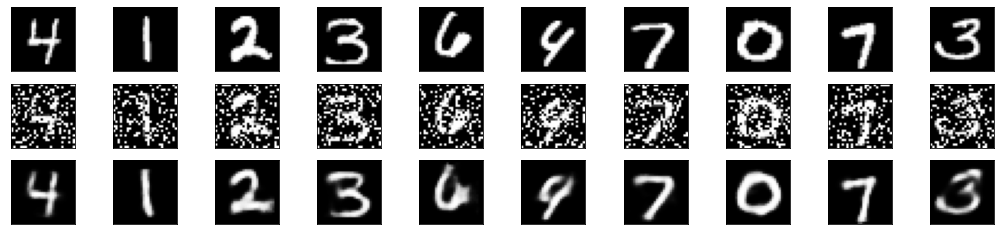

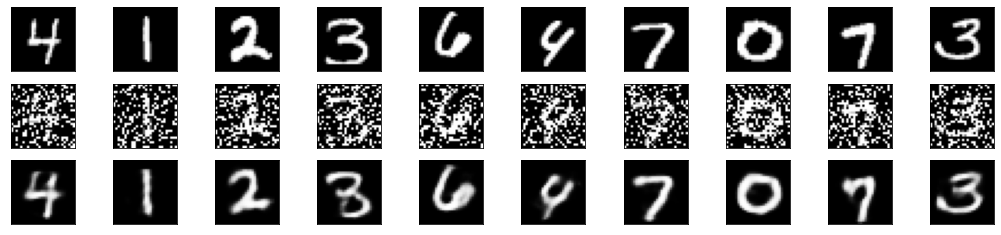

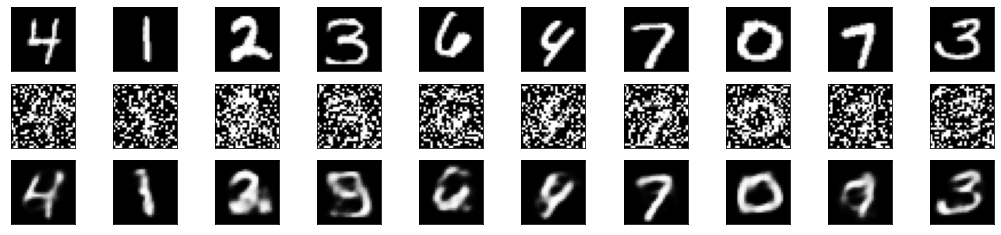

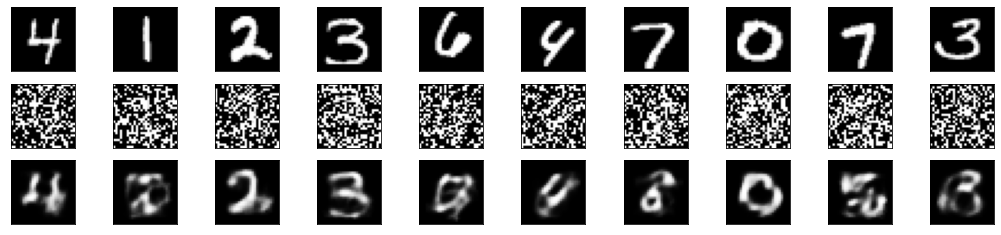

In [29]:
num_images = 10
np.random.seed(45)
random_test_images = np.random.randint(flattened_x_train.shape[0], size=num_images)

seasoned_imgs = []
seasoned_imgs.append(salt_and_pepper(flattened_x_train, noise_level=0.4))
seasoned_imgs.append(salt_and_pepper(flattened_x_train, noise_level=0.5))
seasoned_imgs.append(salt_and_pepper(flattened_x_train, noise_level=0.6))
seasoned_imgs.append(salt_and_pepper(flattened_x_train, noise_level=0.7))

for seasoned in seasoned_imgs:

    decoded_imgs = autoencoder.predict(seasoned)
    
    plt.figure(figsize=(18, 4))

    for i, image_idx in enumerate(random_test_images):
        ax = plt.subplot(3, num_images, i + 1)
        plt.imshow(flattened_x_train[image_idx].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, num_images, num_images + i + 1)
        plt.imshow(seasoned[image_idx].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, num_images, 2*num_images + i + 1)
        plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

### b

I have problem seeing the seasoned picture after 0.4, so in all 3 bottom examples. For the denoising it seems like it starts to get some weird results from 0.6, but very few. At 0.7 however there is a lot of problems and the majority of the pictures are ruined, We would therefore suggest that denoising works at 0.6 but stops working at 0.7

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6853 - accuracy: 0.7985 - val_loss: 0.4128 - val_accuracy: 0.8646
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3437 - accuracy: 0.8891 - val_loss: 0.3488 - val_accuracy: 0.8846
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2744 - accuracy: 0.9120 - val_loss: 0.3344 - val_accuracy: 0.8898
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2236 - accuracy: 0.9286 - val_loss: 0.3270 - val_accuracy: 0.8913
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1814 - accuracy: 0.9431 - val_loss: 0.3358 - val_accuracy: 0.8935
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1491 - accuracy: 0.9541 - val_loss: 0.3297 - val_accuracy: 0.8973
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1196 - accuracy: 0.9636 - val_loss: 0.3934 - val_accuracy: 0.8878
Epoch 

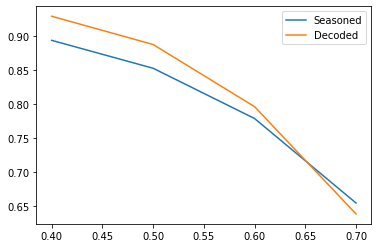

In [30]:
noise = [0.4, 0.5, 0.6, 0.7]

result_season = []
result_decoded = []

for i in noise:
    
    seasoned_train = salt_and_pepper(flattened_x_train, noise_level=i) 
    seasoned_test = salt_and_pepper(flattened_x_test, noise_level=i) 
    decoded_train = autoencoder.predict(seasoned_train)
    decoded_test = autoencoder.predict(seasoned_test)

    fit_info = model.fit(seasoned_train.reshape(-1, 28, 28, 1), y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(seasoned_test.reshape(-1, 28, 28, 1), y_test))
    score = model.evaluate(seasoned_test.reshape(-1, 28, 28, 1), y_test, verbose=0)
    result_season.append(score[1])
    
    fit_info = model.fit(decoded_train.reshape(-1, 28, 28, 1), y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(decoded_test.reshape(-1, 28, 28, 1), y_test))
    score = model.evaluate(decoded_test.reshape(-1, 28, 28, 1), y_test, verbose=0)
    result_decoded.append(score[1])
    

plt.plot(noise, result_season, label = "Seasoned")
plt.plot(noise, result_decoded, label = "Decoded")
plt.legend()
plt.show()

### c
The decoded version is better all the way until 0.7 where seasoned is better. However that was the point where the decoder stopped working, so it is in fact better as long as it works.